# Data cleaning
Clean the data by fixing missing values and creating the adjacency matrix.


## Data exploration
Before creating the network, we need to explore the data to understand the structure of the dataset

In [81]:
import pandas as pd
import numpy as np

patients = pd.read_csv("../dataset/large_dataset.csv")
patients.rename(columns={"diseases": "disease"}, inplace=True)
patients.info()

symptoms = patients.columns.values.tolist()
symptoms = symptoms[1:]
np.savetxt("../dataset/symptoms.txt", symptoms, fmt="%s")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246945 entries, 0 to 246944
Columns: 378 entries, disease to neck weakness
dtypes: int64(377), object(1)
memory usage: 712.2+ MB


In [82]:
patients.describe()

,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,palpitations,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
count,246945.000000,246945.000000,246945.000000,246945.000000,246945.000000,246945.000000,246945.000000,246945.000000,246945.000000,246945.000000,...,246945.0,246945.0,246945.0,246945.0,246945.000000,246945.0,246945.0,246945.0,246945.000000,246945.0
mean,0.039235,0.042746,0.086440,0.061001,0.097252,0.069943,0.039410,0.040572,0.037871,0.024876,...,0.0,0.0,0.0,0.0,0.001385,0.0,0.0,0.0,0.000073,0.0
std,0.194155,0.202285,0.281014,0.239333,0.296302,0.255051,0.194568,0.197296,0.190884,0.155747,...,0.0,0.0,0.0,0.0,0.037189,0.0,0.0,0.0,0.008537,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,1.000000,0.0


In [83]:
patients.sample(15).sort_values('disease').reset_index(drop=True).style.background_gradient(cmap='Blues')

## Handling missing values

In [84]:
#patients.fillna(" ", inplace=True)
#patients = patients.map(lambda x: x.replace(" ", "") if isinstance(x, str) else x)

## One-hot encoding

In [85]:
patients_diseases = patients["disease"].values.tolist()
diseases_list = patients["disease"].drop_duplicates().values.tolist()
np.savetxt("../dataset/diseases.txt", diseases_list, fmt="%s")

# Create a dictionary mapping each unique disease name to a unique numerical label
label_mapping = {disease: label for label, disease in enumerate(set(diseases_list))}

# Map the original disease names to numerical labels
diseases_labels = [label_mapping[disease] for disease in patients_diseases]

# Add the 'Disease' column to the new DataFrame
patients.drop("disease", axis=1, inplace=True)
patients["Disease"] = diseases_labels

patients.to_csv("../dataset/large_one_hot_encoding.csv", index=False)

# Class balance check

<Axes: title={'center': 'Disease distribution'}, xlabel='Disease', ylabel='Percent'>

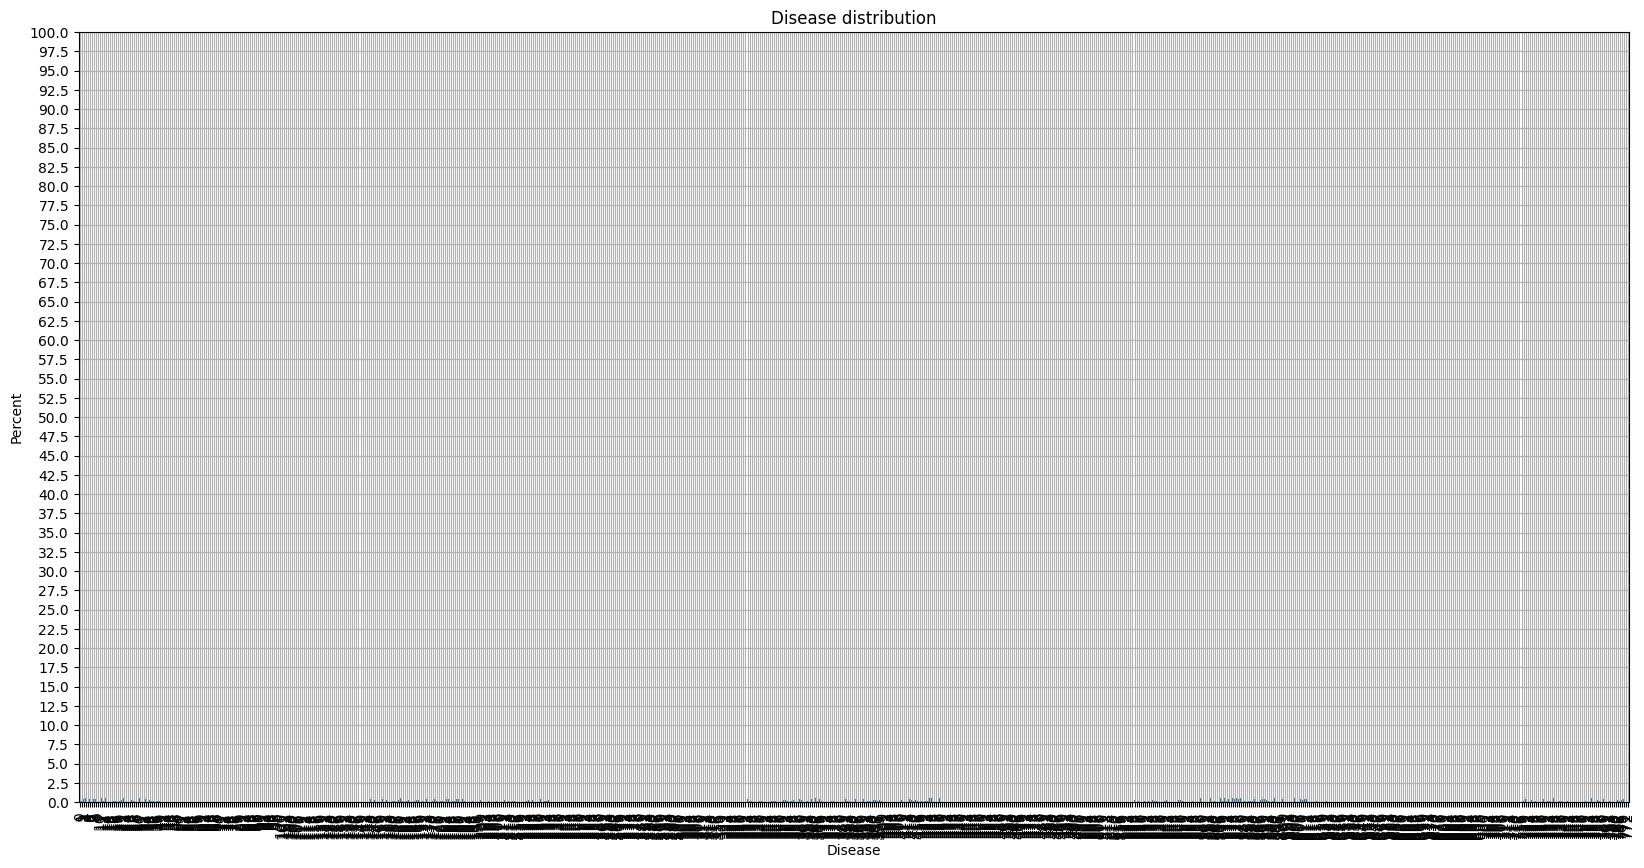

In [86]:
balance_count = patients["Disease"].groupby(patients["Disease"]).count()
balance_percent = balance_count / patients["Disease"].count() * 100

balance_percent.plot(
    kind="bar",
    figsize=(20, 10),
    ylim=(0, 100),
    title="Disease distribution",
    grid=True,
    ylabel="Percent",
    xlabel="Disease",
    yticks=np.arange(0, 101, 2.5),
)

In [87]:
# Store the one-hot-encoded DataFrame in a .npz file
tmp = np.array(patients)
np.savez_compressed("../code/prediction_model/features/symptoms.npz", X = tmp[:,:-1], y = tmp[:,-1])

## Compute adjacency matrix

In [88]:
#adjacency_matrix = one_hot_encoding.groupby("Disease").sum()

#adjacency_matrix = adjacency_matrix.reset_index()
#adjacency_matrix = adjacency_matrix.drop(["Disease", ""], axis=1)

#adjacency_matrix = adjacency_matrix.apply(
#    lambda x: x.map(lambda val: 1 if val != 0 else 0)
#)
#adjacency_matrix["Disease"] = one_hot_encoding["Disease"].unique()

#adjacency_matrix.to_csv("../dataset/adjacency_matrix.csv", index=False)
#adjacency_matrix.head()

### Check if all symptoms are not lost 

In [89]:
columns = patients.columns[:-1].tolist()

difference = [item for item in symptoms if item not in patients.columns]
difference2 = [item for item in columns if item not in symptoms]

print(difference)
print(difference2)

print(len(columns))
print(len(symptoms))

[]
[]
377
377
